## User Overview Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>
              <br/>
            <ul>
             <li><a href='#fe'>Feature Engineering</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
             <li><a href='#r3'>Research Question 3</a></li>
            </ol>
        <br/>
        <li><a href= '#ana'>Analysis<a/></li>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id='intro'></a>
#### Introduction


<a id='obj'></a>
#### Objective

<a id='research'></a>

#### Research Questions

 - Research Question 1
 
     - Top performers
 
          - Who/What are the top tiers accros manufacturers, handsets and customers
          
          - What group of users belong each to the top 5 decile classes based on the total duration for all sessions
   
  
 -  Research Question 2
 
       - User Behaviour in xDR sessions
 
         - What inisghts can be gooten from user behaviour accross the xDR sessions (Data Channel)
  
  
 -  Research Question 3
 
      - Siginificant Relationships 
 
          - Are  there an existing significant relationship across
          
              1. each application & the total DL+UL data
          
              2. the various xDR sessions (Google,Youtbe,Netflix, etc.)
              
              
              
        
 
     


import libraries

In [178]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Load data into workspace

In [179]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [180]:
data

,bearer_id,start,start_ms,end,end_ms,dur___ms_,imsi,msisdn_number,imei,last_location_name,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [181]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur___ms_', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'handset_manufacturer', 'handset_type',
       'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of_s

#### Feature Engineering
 - For this analyis, we would be working with the following features

In [182]:
columns = ['bearer_id', 'dur___ms_','http_dl__bytes_',
           'http_ul__bytes_', 'activity_duration_dl__ms_',
           'activity_duration_ul__ms_',
           'handset_manufacturer', 'handset_type',
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

In [183]:
data2 = data[columns]

In [184]:
data2

,bearer_id,dur___ms_,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,social_media_ul__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,1.823652e+06,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,24420.00000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,1.365104e+06,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,7165.00000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,1.361762e+06,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung galaxy a8 (2018),1.684053e+06,42224.00000,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,1.321509e+06,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,undefined,undefined,6.441210e+05,13372.00000,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,1.089009e+06,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung sm-g390f,8.626000e+05,50188.00000,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,8.123000e+04,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,apple,apple iphone 8 plus (a1897),3.464974e+06,52091.00000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,9.797000e+04,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,apple,apple iphone se (a1723),2.344568e+06,7613.00000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,9.824900e+04,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,apple,apple iphone xs (a2097),1.245845e+06,14394.00000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,9.791000e+04,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,huawei,huawei fig-lx1,8.015470e+05,21562.00000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [185]:
data2.columns

Index(['bearer_id', 'dur___ms_', 'http_dl__bytes_', 'http_ul__bytes_',
       'activity_duration_dl__ms_', 'activity_duration_ul__ms_',
       'handset_manufacturer', 'handset_type', 'social_media_dl__bytes_',
       'social_media_ul__bytes_', 'google_dl__bytes_', 'google_ul__bytes_',
       'email_dl__bytes_', 'email_ul__bytes_', 'youtube_dl__bytes_',
       'youtube_ul__bytes_', 'netflix_dl__bytes_', 'netflix_ul__bytes_',
       'gaming_dl__bytes_', 'gaming_ul__bytes_', 'other_dl__bytes_',
       'other_ul__bytes_', 'total_ul__bytes_', 'total_dl__bytes_'],
      dtype='object')

<a id='r1'></a>

#### Research Question 1

  - Top performers
 
       - Who/What are the top tiers accros manufacturers, handsets and customers
          
       - What group of users belong each to the top 5 decile classes based on the total duration for all sessions

#### Who/What are the top tiers accros manufacturers, handsets and customers
 
 In answering these, we would focus on identifying the following:

- top 10 handsets used by the customers.

- top 3 handset manufacturers

- top 5 handsets per handset manufacturer

> top 10 handsets used by the customers

In [186]:
top10_handests = data2.groupby('handset_type')['bearer_id'].count().reset_index().sort_values('bearer_id', ascending=False).head(10)

In [187]:
top10_handests.rename(columns={'handset_type': 'Handset_Type', 'bearer_id':'Customer_Count'}, inplace=True)

In [188]:
top10_handests

,Handset_Type,Customer_Count
316,huawei b528s-23a,20324
53,apple iphone 6s (a1688),9419
49,apple iphone 6 (a1586),9023
1247,undefined,8987
59,apple iphone 7 (a1778),6326
73,apple iphone se (a1723),5187
66,apple iphone 8 (a1905),4993
78,apple iphone xr (a2105),4568
955,samsung galaxy s8 (sm-g950f),4520
75,apple iphone x (a1901),3813


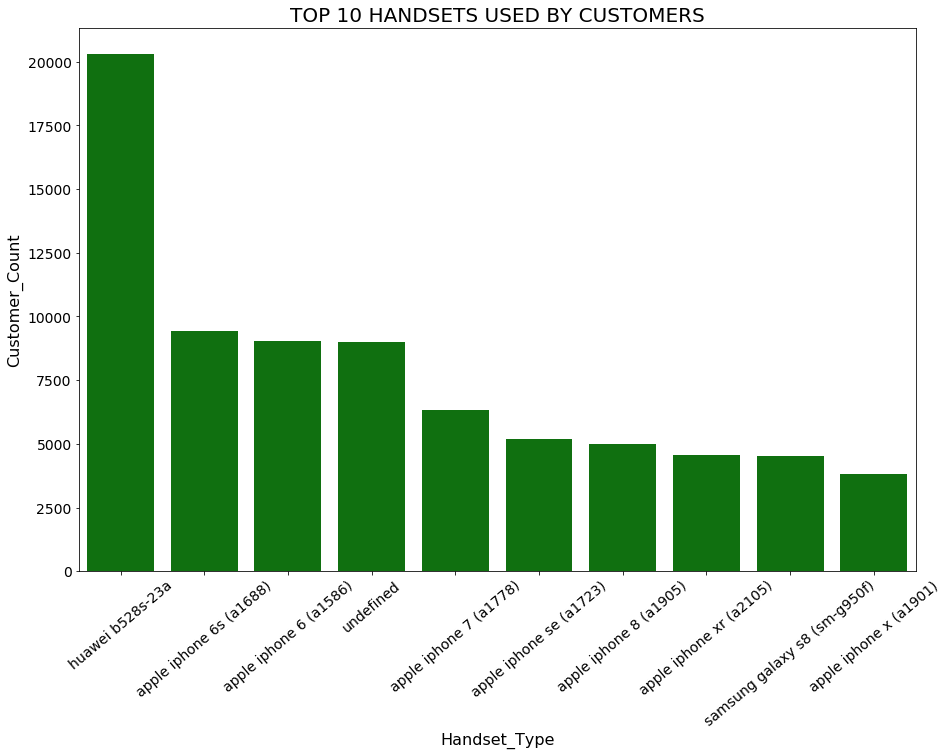

In [189]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Customer_Count', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP 10 HANDSETS USED BY CUSTOMERS', fontsize=20)
sns.barplot(x='Handset_Type', y= 'Customer_Count', data=top10_handests, color='g')
# save chart
plt.savefig(fname='visuals/top10Hansets.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

> top 3 handset manufacturers

In [190]:
top3_man = data2.groupby('handset_manufacturer')['bearer_id'].count().reset_index().sort_values('bearer_id', ascending=False).head(3)

In [191]:
top3_man.rename(columns={'handset_manufacturer': 'Manufacturer', 'bearer_id':'Customer_Count'}, inplace=True)

In [192]:
top3_man

,Manufacturer,Customer_Count
4,apple,60137
93,samsung,40839
46,huawei,34423


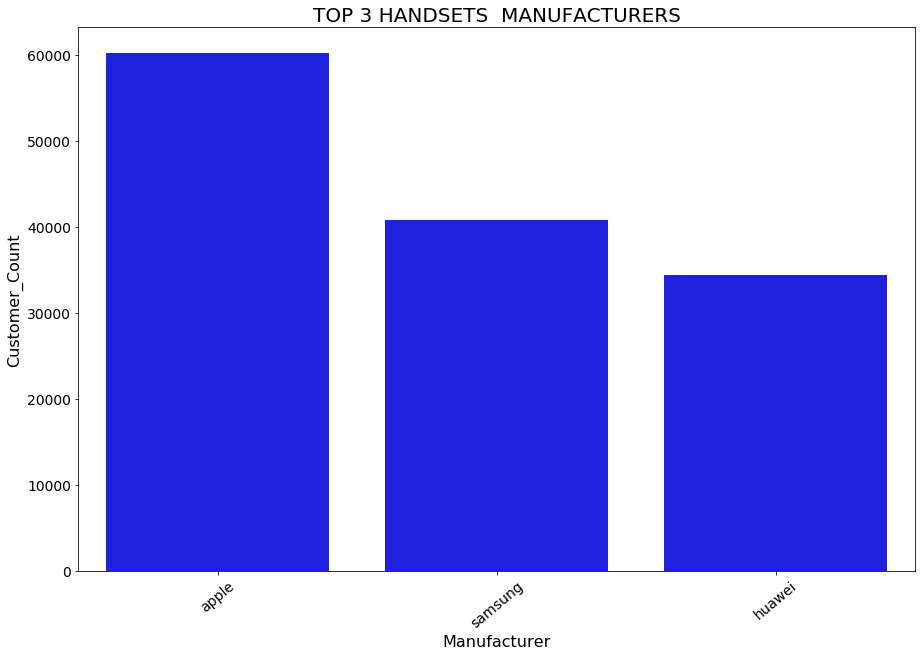

In [193]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Manufacturer', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP 3 HANDSETS  MANUFACTURERS', fontsize=20)
sns.barplot(x='Manufacturer', y= 'Customer_Count', data=top3_man, color='b')
plt.savefig(fname='visuals/top3Man.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

> top 5 handsets per handset manufacturer

In [262]:
top5Hands_man = data2.groupby(['handset_manufacturer','handset_type'])['handset_type'].count()

In [263]:
top5Hands_man

handset_manufacturer                     handset_type                                                                       
a-link telecom international co limited  a-link telecom i. cubot a5                                                             1
                                         a-link telecom i. cubot note plus                                                      1
                                         a-link telecom i. cubot note s                                                         1
                                         a-link telecom i. cubot nova                                                           1
                                         a-link telecom i. cubot power                                                          1
                                                                                                                               ..
zte                                      zte starxtrem by sfr                                  

In [264]:
top5Hands_man=top5Hands_man.reset_index(name='count')

In [265]:
top5Hands_man

,handset_manufacturer,handset_type,count
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1
3,a-link telecom international co limited,a-link telecom i. cubot nova,1
4,a-link telecom international co limited,a-link telecom i. cubot power,1
...,...,...,...
1392,zte,zte starxtrem by sfr,1
1393,zte,zte zte blade c2 smartphone android by sfr sta...,2
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1


In [247]:
top5Hands_man = top5Hands_man.sort_values(['handset_manufacturer', 'count'], ascending=False)

In [272]:
top5Hands_man=top5Hands_man.groupby('handset_manufacturer').head(5)

In [273]:
top5Hands_man = top5Hands_man.rename(columns={'handset_manufacturer':'Manufacturer', 'handset_type':'Handset'})

In [292]:
top5Hands_man

,Manufacturer,Handset,count
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1
3,a-link telecom international co limited,a-link telecom i. cubot nova,1
4,a-link telecom international co limited,a-link telecom i. cubot power,1
...,...,...,...
1380,zte,zte blade a2 plus zte blade a610 plus,1
1381,zte,zte blade a452 blade a452,1
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1


In [ ]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Manufacturer', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP5 5 HANDSETS  MANUFACTURERS', fontsize=20)
sns.catplot(x='Manufacturer', y= 'count', data=top5Hands_man, hue='Handset')
plt.savefig(fname='visuals/top5Hands_man.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

### - m
<!-- Aggregate per user the following information in the column:

    ○ number of xDR sessions
    
    ○ Session duration
    
    ○ the total download (DL) and upload (UL) data
    
    ○ the total data volume (in Bytes) during this session for each application -->

In [ ]:
data2.groupby('bearer_id')[]

<a id='r2'></a>

#### Research Question 2

<a id='r3'></a>

#### Research Question 3